In [11]:
from qiskit import *
from qiskit.visualization import *

In [12]:
def input_lights(lights,  qc, n):

    for index, value in enumerate(lights):
        if value == 1:
            qc.x(n+1+index)

In [13]:
def flip_adjacent(qc, n):
#     flip_dict = {0: [0, 1, 3], 1: [0, 1, 2, 4], 2: [1, 2, 5], 3: [0, 3, 4, 6], 4: [1, 3, 4, 5, 7], 5: [2, 4, 5, 8], 6: [3, 6, 7], 7: [4, 6, 7, 8], 8: [5, 7, 8]}

    qc.cx(0, n+2)
    qc.cx(0, n+3)
    qc.cx(0, n+5)
    
    qc.cx(1, n+2)
    qc.cx(1, n+3)
    qc.cx(1, n+4)
    qc.cx(1, n+6)
    
    qc.cx(2, n+3)
    qc.cx(2, n+4)
    qc.cx(2, n+7)
    
    qc.cx(3, n+2)
    qc.cx(3, n+5)
    qc.cx(3, n+6)
    qc.cx(3, n+8)
    
    qc.cx(4, n+3)
    qc.cx(4, n+5)
    qc.cx(4, n+6)
    qc.cx(4, n+7)
    qc.cx(4, n+9)
    
    qc.cx(5, n+4)
    qc.cx(5, n+6)
    qc.cx(5, n+7)
    qc.cx(5, n+10)
    
    qc.cx(6, n+5)
    qc.cx(6, n+8)
    qc.cx(6, n+9)
    
    qc.cx(7, n+6)
    qc.cx(7, n+8)
    qc.cx(7, n+9)
    qc.cx(7, n+10)
    
    qc.cx(8, n+7)
    qc.cx(8, n+9)
    qc.cx(8, n+10)

In [14]:
def oracle(n):
    qc = QuantumCircuit(n+n+1)
    
    flip_adjacent(qc, n-1)

    qc.x(range(n+1, n+n+1))

    control_qubits = [10, 11, 12, 13, 14, 15, 16, 17, 18]
    qc.mcx(control_qubits, n)

    qc.x(range(n+1, n+n+1))

    flip_adjacent(qc, n-1)
    
    oracle_gate = qc.to_gate()
    oracle_gate.name = 'Oracle'
    
    return oracle_gate

In [15]:
def diffuser(n):
    qc = QuantumCircuit(n)
    
    qc.x(range(n))
    qc.h(n-1)

    control_qubits = [0, 1, 2, 3, 4, 5, 6, 7]
    qc.mcx(control_qubits, n-1, n-1)

    qc.h(n-1)
    qc.x(range(n))
    
    diffuser_gate = qc.to_gate()
    diffuser_gate.name = 'Diffuser'
    
    return diffuser_gate

In [22]:
def main(lights, n):
    qc = QuantumCircuit(n+n+1, n)

    qc.x(n)
    qc.h(range(n+1))
#     qc.barrier()
    
    input_lights(lights, qc, n)
#     qc.barrier()
    
    r = 1
    
    while(r > 0):
        oracle_gate = oracle(n)
        qc.append(oracle_gate, range(n+n+1))

        qc.h(range(n+1))

        diffuser_gate = diffuser(n)
        qc.append(diffuser_gate, range(n))

        qc.h(range(n))
        r = r-1

    qc.measure([8, 7, 6, 5, 4, 3, 2, 1, 0], range(n))
    qc.draw('mpl')
#     qc.measure([18, 17, 16, 15, 14, 13, 12, 11, 10, 8, 7, 6, 5, 4, 3, 2, 1, 0], range(n+n))
#     qc.measure([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18], range(n+n))
    
    return qc

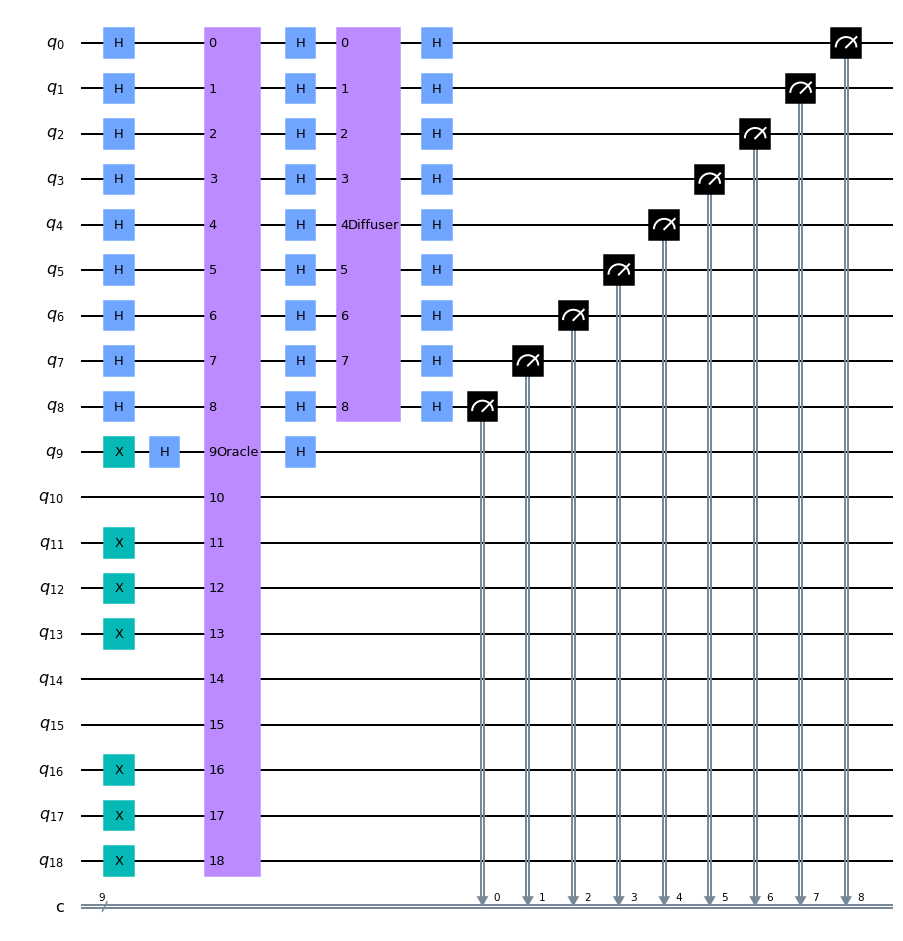

In [23]:
n = 9
lights = [0, 1, 1, 1, 0, 0, 1, 1, 1]
# lights = [1, 0, 0, 0, 0, 0, 1, 0, 0]

qc = main(lights, n)
qc.draw('mpl')

{'000000000': 22, '000000001': 9, '000010000': 19, '100000000': 18, '100000001': 17, '100000010': 8, '100000011': 17, '100000100': 17, '100000101': 18, '100000110': 10, '100000111': 25, '100001000': 20, '100001001': 15, '100001010': 13, '100001011': 6, '100001100': 15, '100001101': 12, '100001110': 16, '100001111': 15, '000010001': 13, '100010000': 6, '100010001': 7, '100010010': 27, '100010011': 12, '100010100': 10, '100010101': 11, '100010110': 11, '100010111': 17, '100011000': 20, '100011001': 12, '100011010': 11, '100011011': 17, '100011100': 23, '100011101': 15, '100011110': 14, '100011111': 19, '000010010': 23, '100100000': 14, '100100001': 17, '100100010': 22, '100100011': 17, '100100100': 17, '100100101': 14, '100100110': 21, '100100111': 16, '100101000': 16, '100101001': 16, '100101010': 17, '100101011': 14, '100101100': 13, '100101101': 15, '100101110': 11, '100101111': 20, '000010011': 17, '100110000': 14, '100110001': 21, '100110010': 13, '100110011': 11, '100110100': 19, '

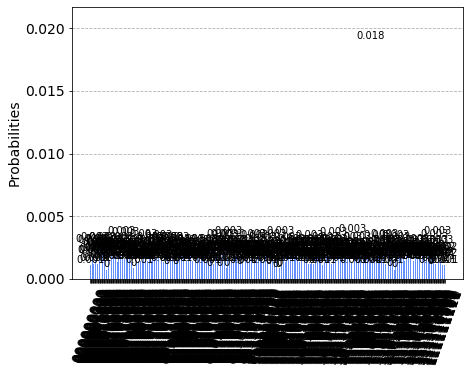

In [25]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots = 8192, optimization_level = 3).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

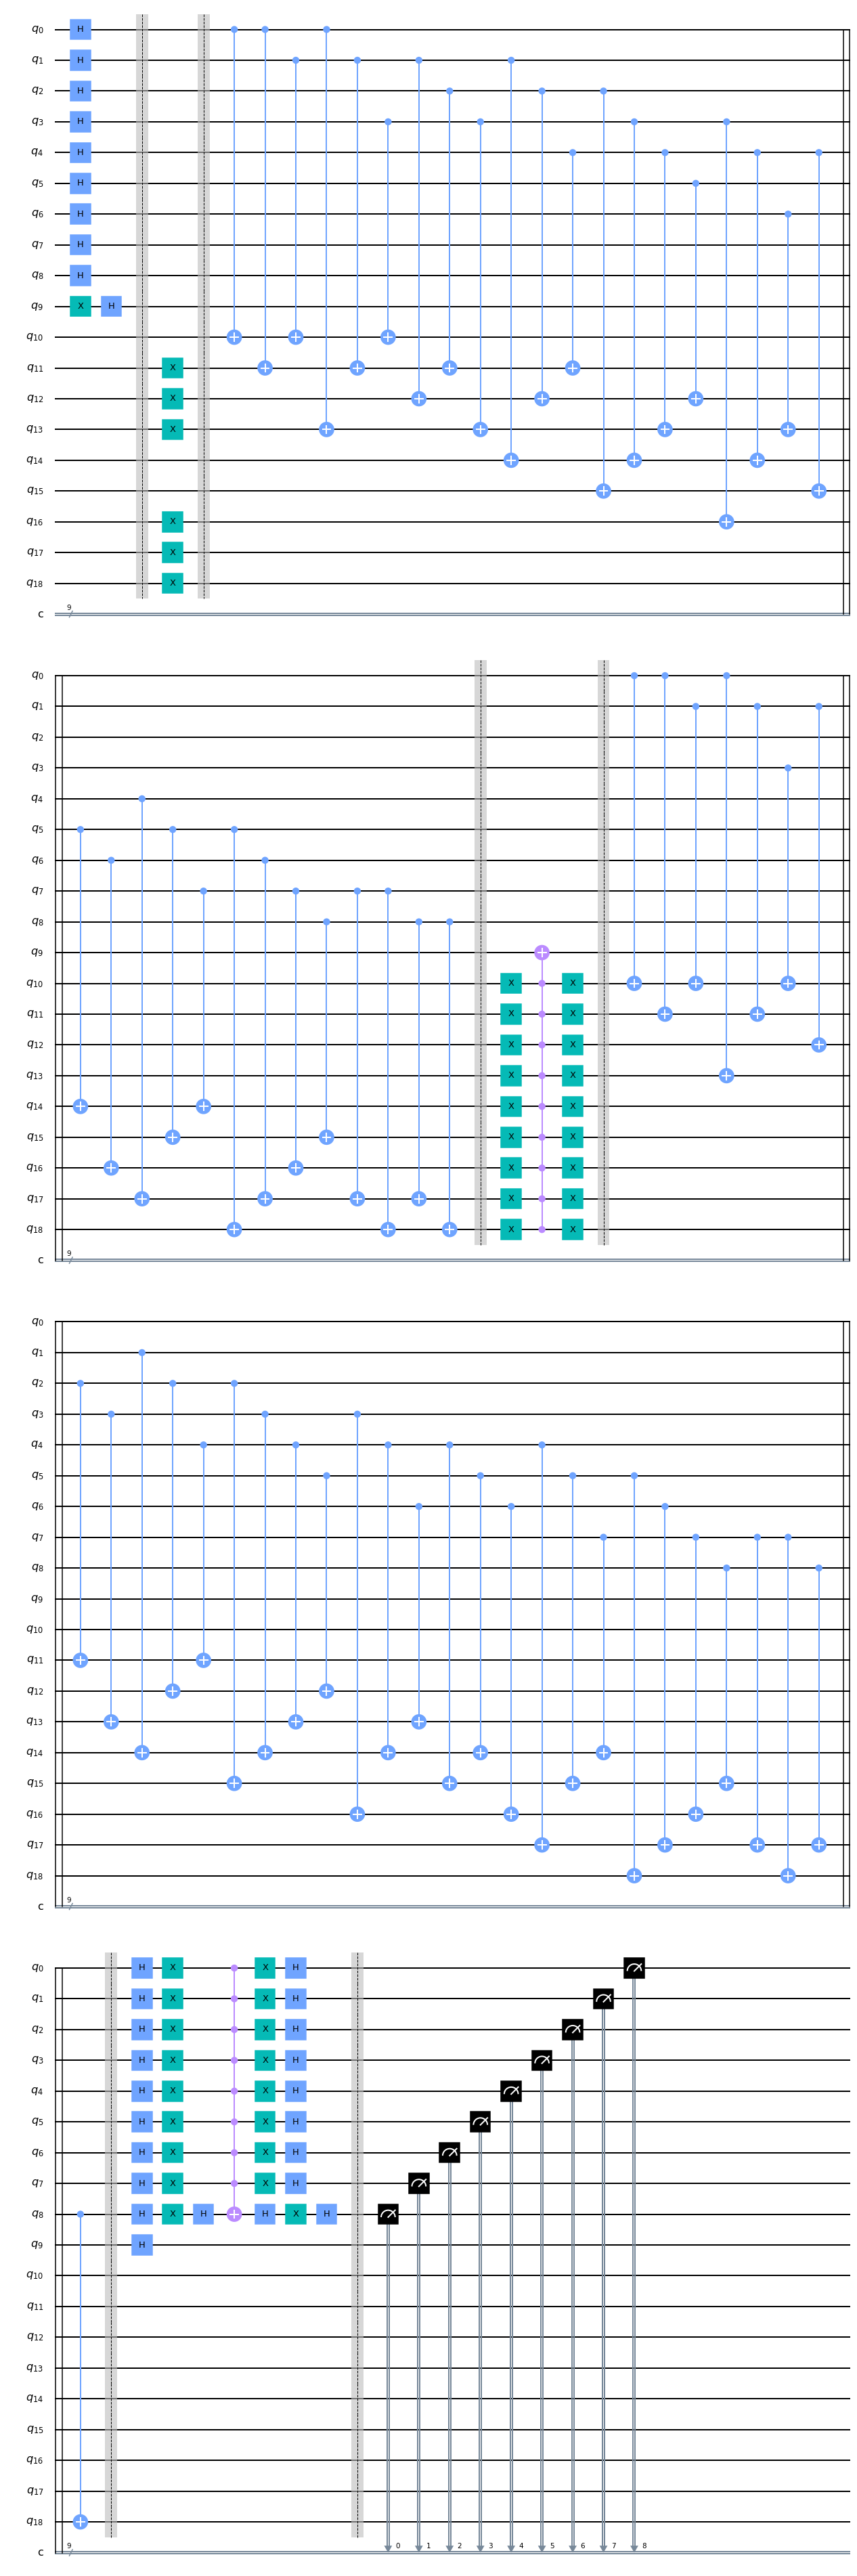

In [26]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc)
# new_circuit.draw('mpl')

In [27]:
new_circuit.count_ops()

OrderedDict([('u3', 2376), ('cx', 2362), ('measure', 9)])